In [10]:
my_dict = {"a": 5, "b": 10, "c":7}
my_dict = {k: v for k, v in sorted(my_dict.items(), key=lambda item: item[1])}
current = my_dict.popitem()
my_dict



{'a': 5, 'c': 7}

In [16]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians
starting_latlon = [40.85971, -73.90891]
dest_latlon = [40.85745, -73.90965]
start_in_radians = [radians(_) for _ in starting_latlon]
dest_in_radians = [radians(_) for _ in dest_latlon]
(haversine_distances([start_in_radians, dest_in_radians]) * 6371)[0][1]

0.25889186891201926

KeyError: 49716206

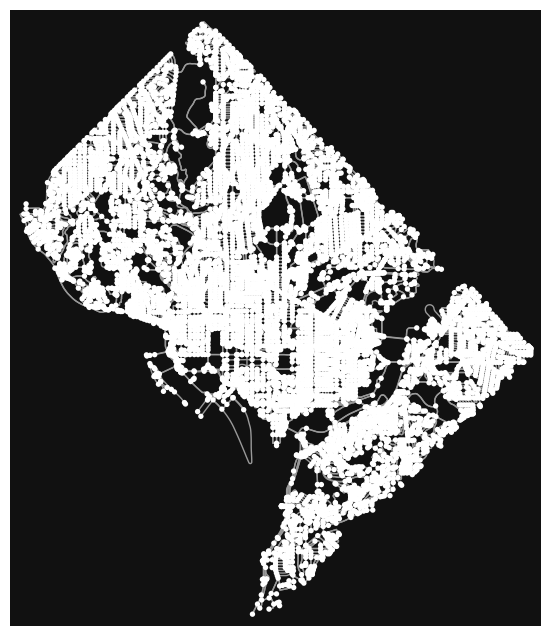

In [18]:
import osmnx as ox
import json
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import networkx as nx


G = ox.graph_from_place('District of Columbia', network_type='drive')
# ox.plot_graph(G)
# G.nodes[49198977]
# nn = ox.distance.nearest_nodes(G, -77.09835815, 38.95207214355)
# g = G.nodes[49198977]
# g
# nn
# ox.plot_graph(G, bgcolor = "w", node_color = "r", edge_color = "#aaa", figsize = (12,12))
ox.plot_graph_route(G, [49716206, 49716208, 49716210, 49716212, 49716214, 49857286, 49857284, 49857282, 49857280, 49857279, 49857278, 49857276, 49857274, 49857272, 49857270, 49841592, 49857267, 49857265, 49857263, 49857261, 49857259, 49857257, 49857256, 49857254, 49857252, 49857249, 49716219, 49716220, 49716221, 49716222, 49716223], route_linewidth=4, route_alpha=0.5)

In [1]:
from pyrosm import OSM
import osmnx as ox
from json import dumps, loads
from sklearn.metrics.pairwise import haversine_distances
from math import radians


def calc_haversine_distance(start_y, start_x, dest_y, dest_x):
    starting_latlon = [start_y, start_x]
    dest_latlon = [dest_y, dest_x]
    start_in_radians = [radians(_) for _ in starting_latlon]
    dest_in_radians = [radians(_) for _ in dest_latlon]
    h_distance = (haversine_distances([start_in_radians, dest_in_radians]) * 6371)[0][1]
    return h_distance

osm = OSM("new-york-latest.osm.pbf")
nodes, edges = osm.get_network(nodes=True, network_type = "driving")
# edges.head()
G = osm.to_graph(nodes, edges, graph_type="networkx")
node_dict = {}
for g in G.nodes():
    g_lat = G.nodes[g]['y']
    g_lon = G.nodes[g]['x']
    neighbors = list(G.neighbors(g))
    neighbor_dict = {}
    for n in neighbors:
        n_lat = G.nodes[n]['y']
        n_lon = G.nodes[n]['x']
        dist = calc_haversine_distance(g_lat, g_lon, n_lat, n_lon)
        neighbor_dict.update({n: dist})
        node_dict.update({g: (g_lat, g_lon, neighbor_dict)})


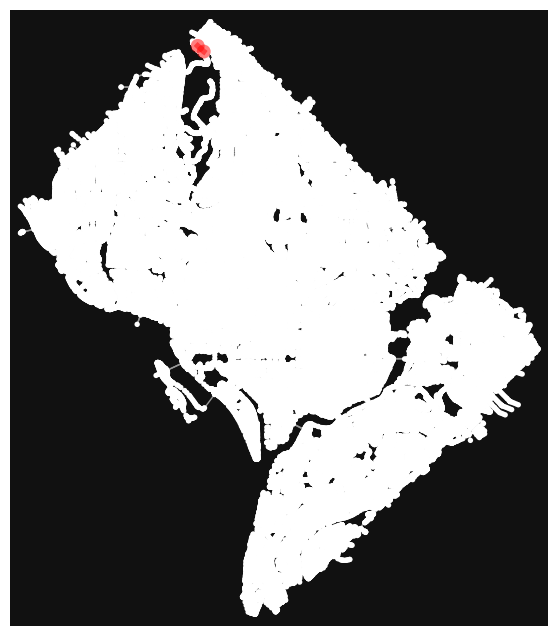

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
ox.plot_graph_route(G, [49716206, 49716208, 49716210, 49716212, 49716214, 49857286, 49857284, 49857282, 49857280, 49857279, 49857278, 49857276, 49857274, 49857272, 49857270, 49841592, 49857267, 49857265, 49857263, 49857261, 49857259, 49857257, 49857256, 49857254, 49857252, 49857249, 49716219, 49716220, 49716221, 49716222, 49716223], route_linewidth=4, route_alpha=0.5)

In [8]:
import sqlite3
import json


# Connect to SQLite database
conn = sqlite3.connect('nodes.db')
cursor = conn.cursor()

# Create table
cursor.execute('''CREATE TABLE IF NOT EXISTS locations
                (id INTEGER PRIMARY KEY,
                lat REAL,
                lon REAL,
                children TEXT)''')

# Insert data into table
for parent_id, (lat, lon, child_distances) in node_dict.items():
    cursor.execute("INSERT INTO locations (id, lat, lon, children) VALUES (?, ?, ?, ?)",
                   (parent_id, lat, lon, json.dumps(child_distances)))

# Commit changes and close connection
conn.commit()
conn.close()    


In [45]:
new_con = sqlite3.connect("nodes.db")
new_cur = new_con.cursor()
res = new_cur.execute("SELECT children FROM locations WHERE id = ?", (310748060,))
res2 = res.fetchone()

children = res2[0]
neighbors = json.loads(children)
neighbors
new_con.close()

In [5]:
import sqlite3
connection = sqlite3.connect("nodes.db")
connection.execute("DROP TABLE locations")

print("successful")

connection.close()

successful
